Describe a scenario where the mean and median values of a dataset may differ significantly. What insights can be gained by examining this difference? Can you propose any solutions to handle this discrepancy? Additionally, how can Python be used to implement these solutions and what are some real-world examples of this phenomenon?

The mean and median of a data set will significantly differ when you have extreme outliers on either side of a normal distribution. By examining the difference of these values in a dataset we can learn more about the distubition of the data. If mean and median are similar, the distibution is symmetric. If there is a large difference, the data has a skewed distribution(UC Berkeley 2019). It can also lead us to asking questions about the factors that lead to outliers within the dataset, and making discoveries as to what is impacting those data points.

As part of a study, blood product usage for liver transplant surgery was documented in 2022 for 448 patients. Excess data and patient information have been removed. Liver transplantation is a high-risk surgery performed to treat liver disease. Many of these patients have co-morbidities and are very ill. For this reason, there are many outliers when it comes to blood loss requiring the need of transfusion. From looking at the many outliers, we may want to look at other patient dignosis or transplant protocols that can affect blood usage. 

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#read csv
data = pd.read_csv('liver_transfusions.csv')

In [3]:
#convert data to pandas dataframe
df= pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   PT                   448 non-null    int64
 1   RC_used              448 non-null    int64
 2   Plasma_Used          448 non-null    int64
 3   Cryo_Used            448 non-null    int64
 4   Platelets_Used       448 non-null    int64
 5   Total_products_used  448 non-null    int64
dtypes: int64(6)
memory usage: 21.1 KB


In [5]:
#rename columns for easier EDA
df = df.rename(columns={'PT':'Patient num','RC_used':'RBC','Plasma_Used':'FFP',
                        'Cryo_Used':'CRYO','Platelets_Used':'PLT','Total_products_used':'TOTAL'})

In [6]:
df.describe()

,Patient num,RBC,FFP,CRYO,PLT,TOTAL
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,224.500000,10.515625,5.917411,3.287946,1.133929,20.854911
std,129.470717,10.681885,9.480929,3.350467,1.479135,21.800066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.750000,4.000000,1.000000,0.750000,0.000000,8.000000
50%,224.500000,8.000000,4.000000,2.000000,1.000000,15.000000
75%,336.250000,13.000000,7.000000,4.000000,2.000000,27.000000
max,448.000000,82.000000,121.000000,22.000000,10.000000,151.000000


Text(0.5, 1.0, 'Transfusions By Product Category')

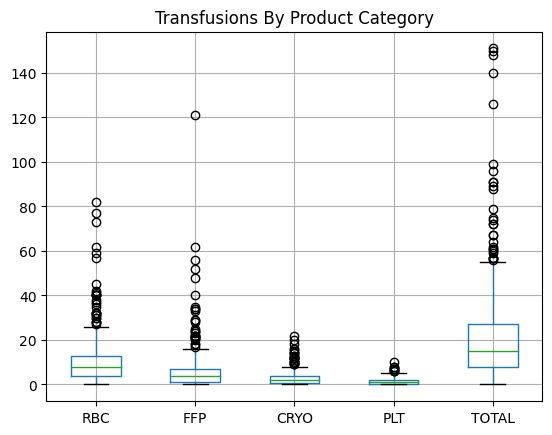

In [7]:
#Use boxplot of dataframe columns to get outliers
df.boxplot(column=['RBC','FFP','CRYO','PLT','TOTAL'])
plt.title('Transfusions By Product Category')

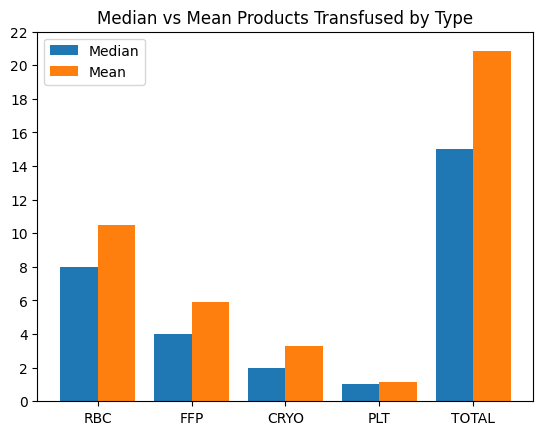

In [8]:
# plot medians and means
product_category=['RBC','FFP','CRYO','PLT','TOTAL']
Median = [np.median(df['RBC']),np.median(df['FFP']),np.median(df['CRYO']),np.median(df['PLT']),np.median(df['TOTAL'])]
Mean = [np.mean(df['RBC']),np.mean(df['FFP']),np.mean(df['CRYO']),np.mean(df['PLT']),np.mean(df['TOTAL'])]

X_ax = np.arange(len(product_category))
plt.bar(X_ax - 0.2, Median, 0.4, label = 'Median') 
plt.bar(X_ax + 0.2, Mean, 0.4, label = 'Mean') 
  
plt.xticks(X_ax, product_category) 
plt.yticks(np.arange(0, 24, 2)) 
plt.title("Median vs Mean Products Transfused by Type") 
plt.legend() 
plt.show() 

We can see by the boxplot there are many outliers that can impact the data shown here. In the bar chart we can see that the median of the data is lower in every instance. The total median is 5 less than the total mean. 
To combat this we can use other statistical means that take into consideration outlier values. One way to try and reduce discrepancy with the data is to use other forms of mean such as geometric and harmonic. Geometric mean takes the nth square root of the product. Harmonic mean takes the number of values divided by the sum of 1/each value. 
To calculate geometric and harmonic mean, we will need to get rid of zero values. I show two methods to get rid of zero values below. The first is by replacing with 0 and the second is by replacing 0 with median values. 

In [9]:
#Delete rows where a value is 0 to compute geometric and harmonic mean
df2 = df[(df != 0).all(1)]

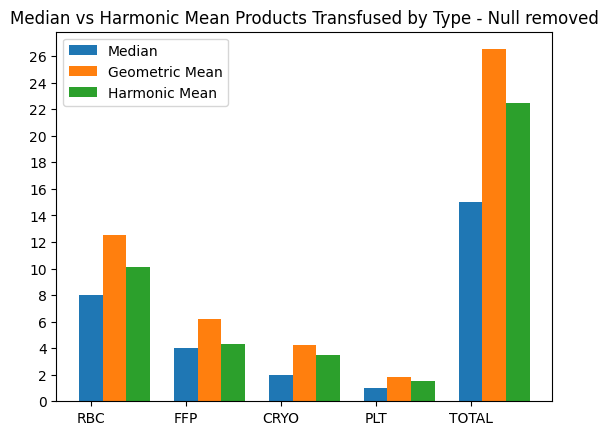

In [10]:
#Geometric mean
Geometric = [stats.gmean(df2['RBC']),stats.gmean(df2['FFP']),stats.gmean(df2['CRYO']),stats.gmean(df2['PLT']),stats.gmean(df2['TOTAL'])]
Harmonic = [stats.hmean(df2['RBC']),stats.hmean(df2['FFP']),stats.hmean(df2['CRYO']),stats.hmean(df2['PLT']),stats.hmean(df2['TOTAL'])]
X_ax = np.arange(len(product_category))
width = 0.25
plt.bar(X_ax, Median, width, label = 'Median') 
plt.bar(X_ax+width, Geometric, width, label = 'Geometric Mean') 
plt.bar(X_ax + width*2, Harmonic, width, label = 'Harmonic Mean') 
  
plt.xticks(X_ax, product_category) 
plt.yticks(np.arange(0, 28, 2)) 
plt.title("Median vs Harmonic Mean Products Transfused by Type - Null removed") 
plt.legend() 
plt.show() 


By dropping rows with 0 values in the data frame, geometric and harmonic mean yield much higher medians than the normal mean. 

In [11]:
# plot same figure, but with 0 values replaced by median
df3 = df
df3['RBC'] = df['RBC'].where(df['RBC']>0,np.median(df['RBC']))
df3['FFP'] = df['FFP'].where(df['FFP']>0,np.median(df['FFP']))
df3['CRYO'] = df['CRYO'].where(df['CRYO']>0,np.median(df['CRYO']))
df3['PLT'] = df['PLT'].where(df['PLT']>0,np.median(df['PLT']))
df3['TOTAL'] = df['TOTAL'].where(df['TOTAL']>0,np.median(df['TOTAL']))

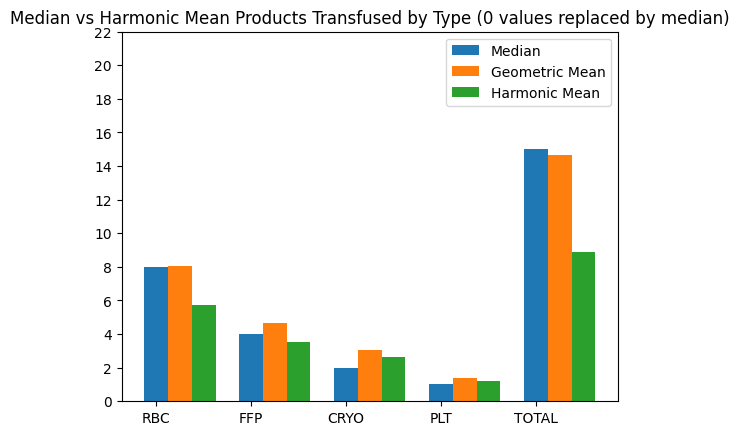

In [12]:
#Geometric mean
Geometric2 = [stats.gmean(df3['RBC']),stats.gmean(df3['FFP']),stats.gmean(df3['CRYO']),stats.gmean(df3['PLT']),stats.gmean(df3['TOTAL'])]
Harmonic2 = [stats.hmean(df3['RBC']),stats.hmean(df3['FFP']),stats.hmean(df3['CRYO']),stats.hmean(df3['PLT']),stats.hmean(df3['TOTAL'])]
X_ax = np.arange(len(product_category))
width = 0.25
plt.bar(X_ax, Median, width, label = 'Median') 
plt.bar(X_ax+width, Geometric2, width, label = 'Geometric Mean') 
plt.bar(X_ax + width*2, Harmonic2, width, label = 'Harmonic Mean') 
  
plt.xticks(X_ax, product_category) 
plt.yticks(np.arange(0, 24, 2)) 
plt.title("Median vs Harmonic Mean Products Transfused by Type (0 values replaced by median)") 
plt.legend() 
plt.show() 


Here we calulate geometric and harmonic mean by replacing rows with 0 values in the data frame with the median. Here we can see the values for geometric mean are now closer than any of the previous means we have calulcated. Harmonic mean in this case has actually fallen below the median for all product types except platelets. 

In [13]:
#define titles of stats and create list of means calculated
titles = (['Median', 'Mean','Geometric mean dropped zeros','Harmonic mean dropped zeros',
           'Geometric mean replaced zeros','Harmonic mean replaced zeros'])
mean_med_data = [Median, Mean, Geometric, Harmonic, Geometric2, Harmonic2]

In [14]:
#pack list into data frame and print for viewing of values
stats_df = pd.DataFrame(np.round(mean_med_data,2), columns = product_category)
stats_df.insert(0,'STAT_METHOD',titles)
stats_df

,STAT_METHOD,RBC,FFP,CRYO,PLT,TOTAL
0,Median,8.00,4.00,2.00,1.00,15.00
1,Mean,10.52,5.92,3.29,1.13,20.85
2,Geometric mean dropped zeros,12.54,6.23,4.22,1.80,26.51
3,Harmonic mean dropped zeros,10.08,4.32,3.49,1.56,22.46
4,Geometric mean replaced zeros,8.06,4.65,3.08,1.36,14.69
5,Harmonic mean replaced zeros,5.71,3.50,2.63,1.23,8.89


references

Brownlee, J. (2020, August 19). Arithmetic, geometric, and harmonic means for machine learning. MachineLearningMastery.com. https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/ 
Garcia, J., Jones, S., Williams, L. Lu, Q., Adamski, J. Mayo Clinic Arizona. 2022. Machine Perfusion versus Cold Storage Platelets on Blood Product Usage During liver Transplantation. Internal Study.
GfG. (2021, February 25). Plotting multiple bar charts using Matplotlib in python. GeeksforGeeks. https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/ 
Measures of location and spread. Statistics at UC Berkeley. (n.d.). https://www.stat.berkeley.edu/~stark/SticiGui/Text/location.htm 
Pandas.dataframe.replace#. pandas.DataFrame.replace - pandas 2.2.1 documentation. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html 
Real Python. (2023, October 21). Python Statistics Fundamentals: How to Describe Your Data. https://realpython.com/python-statistics/ 

video: https://www.loom.com/share/fee8f43d7c3e490c9c093a6566d54d65?sid=4ff827b1-6340-4f3f-a72b-27a670f12bec